In this notebook, I'll be looking into Part 1 of the Ultimate Data Science Challenge, which is the EDA section for logins in a specific location.

In [38]:
import json
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
login_df = pd.read_json('logins.json')
login_df.head(6)

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
5,1970-01-01 20:21:41


In [3]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [4]:
login_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


So from a quick description of the logins, we can see that the data stretch from January 1st, 1970 to April 13th, 1970. 

In [6]:
uniq_times, uniq_count = np.unique(login_df.login_time.values, return_counts=True)
print(len(uniq_times), len(uniq_count))
print(type(uniq_times[0]))

92265 92265
<class 'numpy.datetime64'>


In [8]:
df2 = pd.DataFrame(data=uniq_count, index=uniq_times, columns=['login_number'])
df2.head(6)

,login_number
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1
1970-01-01 20:21:41,1


In [26]:
login_15min = df2.resample('15T').sum()
inactive_times = np.where(login_15min.login_number.values == 0)[0]
print(len(inactive_times))
print(inactive_times)
missing_times = np.where(np.isnan(login_15min.login_number.values))[0]
print(len(missing_times))

407
[   6   33   41   88  147  152  153  237  330  332  336  382  421  427
  430  464  476  532  612  614  616  618  652  653  654  655  656  660
  661  662  710  715  722  723  819  890  891  916  918  919  998 1008
 1041 1089 1093 1097 1100 1103 1104 1189 1191 1192 1193 1288 1293 1294
 1295 1297 1299 1301 1384 1385 1393 1496 1498 1666 1673 1674 1676 1679
 1761 1763 1766 1768 1769 1770 1774 1777 1815 1822 1861 1862 1864 1865
 1866 1873 1904 1913 1962 1963 1966 1967 1968 2010 2016 2053 2061 2064
 2068 2156 2160 2163 2255 2256 2262 2269 2313 2334 2335 2345 2350 2352
 2392 2435 2438 2443 2444 2446 2449 2450 2477 2487 2488 2538 2541 2544
 2549 2588 2630 2634 2636 2640 2727 2730 2738 2831 2838 2840 2845 2924
 2928 2932 2935 3018 3021 3025 3099 3110 3112 3117 3118 3121 3123 3149
 3158 3159 3192 3206 3207 3209 3210 3211 3217 3245 3255 3262 3301 3302
 3303 3306 3311 3314 3315 3402 3407 3408 3411 3412 3502 3508 3509 3592
 3689 3690 3741 3742 3743 3784 3786 3787 3788 3791 3793 3794 3831 3880
 3

Now we have a dataframe for logins at 15 minute intervals. It is clear that there are 407 inactive intervals in the data, most of which are not sequential for more than 30 minutes or so, while there is no missing data. Though the data ends at April 13th rather than the end of the month, so one could argue we are missing data for the end of that month. Though that could be for a specific reason not given to us.

Let's see what this data looks like visually.

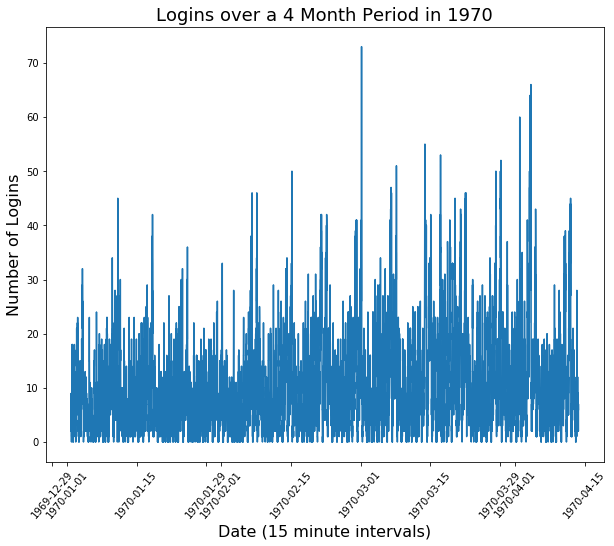

In [22]:
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.plot(login_15min)
_ = axes.set_xlabel('Date (15 minute intervals)', fontsize=16)
_ = axes.set_ylabel('Number of Logins', fontsize=16)
_ = axes.set_title('Logins over a 4 Month Period in 1970', fontsize=18)
_ = plt.xticks(rotation=50)
plt.show()

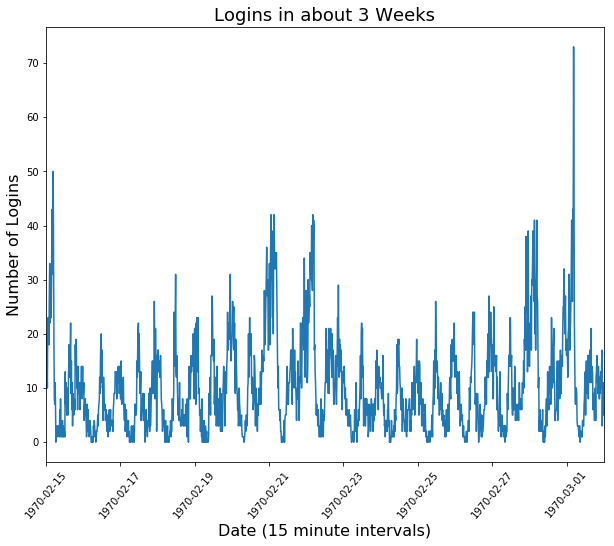

In [23]:
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.plot(login_15min)
_ = axes.set_xlim(['1970-02-15', '1970-03-02'])
_ = axes.set_xlabel('Date (15 minute intervals)', fontsize=16)
_ = axes.set_ylabel('Number of Logins', fontsize=16)
_ = axes.set_title('Logins in about 3 Weeks', fontsize=18)
_ = plt.xticks(rotation=50)
plt.show()

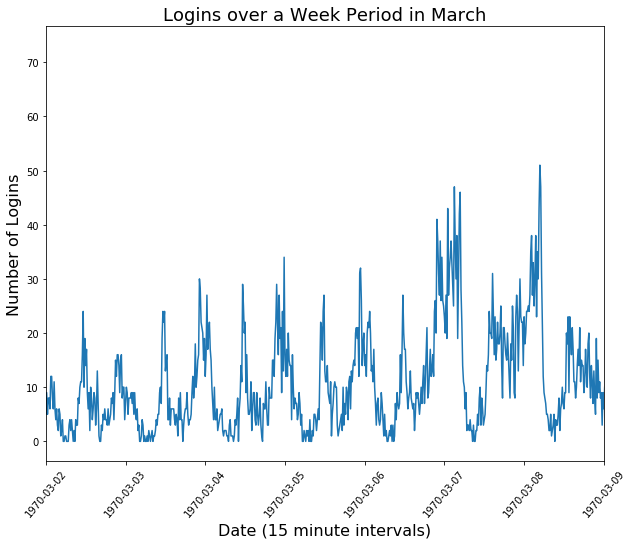

In [20]:
fig, axes = plt.subplots(figsize=(10,8))
_ = axes.plot(login_15min)
_ = axes.set_xlim(['1970-03-02', '1970-03-09'])
_ = axes.set_xlabel('Date (15 minute intervals)', fontsize=16)
_ = axes.set_ylabel('Number of Logins', fontsize=16)
_ = axes.set_title('Logins over a Week Period in March', fontsize=18)
_ = plt.xticks(rotation=50)
plt.show()

So here I have created login visualizations for three different intervals (all the data, a three week period, and one week). There are clearly patterns of login activity and inactivity over these intervals. The peaks seem to happen about twice a day, one near midnight, and another around midday. They can be sustained in some days, and highly peaked in others. The peaks do not seem to be appreciably larger at either of these times.

In [27]:
login_months = df2.resample('M').sum()
login_months.head()

,login_number
1970-01-31,21239
1970-02-28,24673
1970-03-31,33723
1970-04-30,13507


If you ignore April (because we only have data for roughly half the month), there is a clear increase in logins over time, with an obvious peak in March. If April's second half was equal to its first, then the logins would be decreasing back to before-March levels. Perhaps there was some reason why March saw many more logins than the other months.